In [220]:
#import packages required for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import pca
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import *
from IPython.display import display
import random
%matplotlib inline

In [221]:
data=pd.read_csv('CC.csv')

In [222]:
data.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7995,C18211,1969.737768,1.000000,0.00,0.00,0.0,2410.842591,0.000000,0.000000,0.0,0.222222,33,0,2500.0,292.443409,737.614283,0.000000,9
8251,C18472,2149.205166,0.909091,0.00,0.00,0.0,1114.317913,0.000000,0.000000,0.0,0.181818,2,0,3000.0,3230.180347,12748.983060,0.000000,11
4777,C14911,56.116326,0.181818,368.47,368.47,0.0,66.320495,0.083333,0.083333,0.0,0.083333,2,5,2500.0,174.470592,167.468800,1.000000,12
3579,C13680,33.117601,0.909091,157.61,157.61,0.0,0.000000,0.333333,0.333333,0.0,0.000000,0,8,1800.0,173.321501,135.658586,0.142857,12
7054,C17246,189.463475,1.000000,0.00,0.00,0.0,662.790719,0.000000,0.000000,0.0,0.166667,3,0,500.0,1082.344709,132.396963,0.166667,12


In [223]:
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

C:\Users\KRISH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


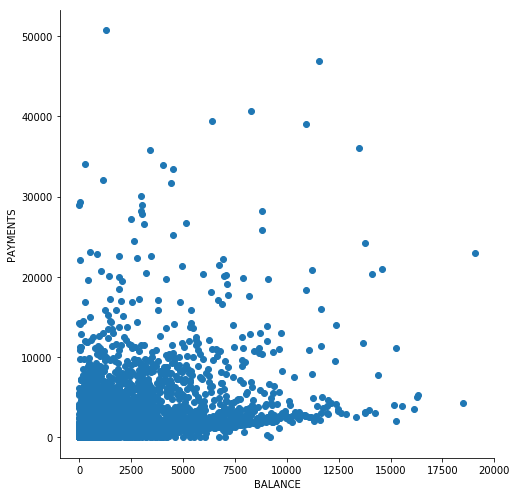

In [225]:
sns.FacetGrid(data,size=7)\
.map(plt.scatter,'BALANCE','PAYMENTS')\
.add_legend()

In [226]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [227]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [229]:
data.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
762,C10790,5639.464394,1.000000,717.18,399.15,318.03,3856.971744,0.416667,0.166667,0.250000,0.750000,16,7,7000.0,1460.652254,1540.175186,0.0,12
7186,C17381,0.000000,0.000000,269.28,0.00,269.28,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,1500.0,208.949793,864.206542,0.0,12
5748,C15908,1267.621753,1.000000,107.05,64.55,42.50,0.000000,0.416667,0.250000,0.083333,0.000000,0,5,4000.0,505.790714,382.369780,0.0,12
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,864.206542,0.0,12
6903,C17092,720.995394,0.909091,547.46,457.46,90.00,455.540479,0.909091,0.636364,0.454545,0.363636,13,23,900.0,315.918387,544.286252,0.0,11


In [230]:
data_label=data.drop(['CUST_ID'],axis=1)

In [231]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()

scaler.fit(data_label)
X_scaled_array = scaler.transform(data_label)


C:\Users\KRISH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KRISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [232]:
X_scaled = pd.DataFrame(X_scaled_array, columns = data_label.columns)
print(X_scaled)
temp=X_scaled
print(temp)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
5     0.117878           0.518084   0.154492         -0.356934   
6    -0.450277           0.518084   2.849408          3.500548   
7     0.124520           0.518084  -0.265388         -0.356934   
8    -0.264026           0.518084  -0.066330          0.041603   
9    -0.678504          -1.400712   0.130303          0.415209   
10   -0.130368           0.518084  -0.038888         -0.356934   
11   -0.448579          -0.249434   0.228866          0.542081   
12   -0.022843           0.518084   1.036634          1.149414   
13   -0.308819           0.518084   0.531110         -0.103915   
14    0.58

In [233]:
#model
#apply kmeans clustering algorithm
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_scaled)
#cluster centers
print(kmeans.cluster_centers_)
print(temp)

[[ 0.31425119  0.43995548  1.52719501  1.27970461  1.25956985 -0.24835921
   1.14310532  1.56200495  0.95585578 -0.36070852 -0.25223502  1.67899486
   0.89009226  0.8343894   0.15425328  0.4946452   0.30324596]
 [-0.36740056 -0.17776182 -0.23299362 -0.20451237 -0.17508274 -0.30945921
  -0.06320308 -0.23554013 -0.04857275 -0.33390144 -0.29849262 -0.24372071
  -0.33673609 -0.28443358 -0.13543251  0.00704478 -0.02881901]
 [ 1.16500135  0.34070291 -0.28957271 -0.20708533 -0.30430586  1.37859864
  -0.64298353 -0.30676918 -0.55405367  1.55930121  1.33956161 -0.36601149
   0.60150212  0.44414745  0.39969863 -0.4100761  -0.12437175]]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -

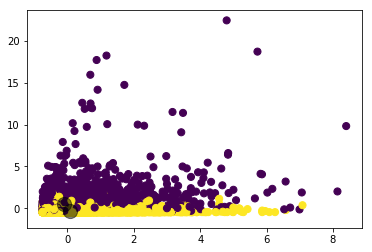

For n_clusters = 2, silhouette score is 0.20950134853896507)


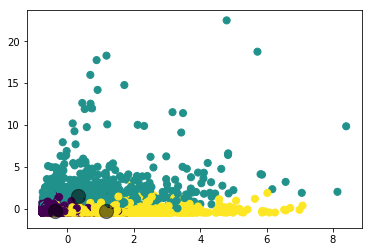

For n_clusters = 3, silhouette score is 0.24996085627555276)


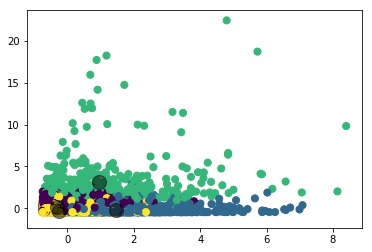

For n_clusters = 4, silhouette score is 0.1976074492720698)


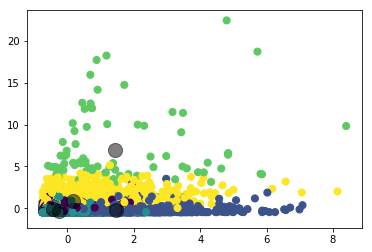

For n_clusters = 5, silhouette score is 0.19310137562222096)


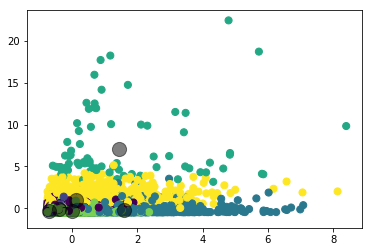

For n_clusters = 6, silhouette score is 0.20252375823214833)


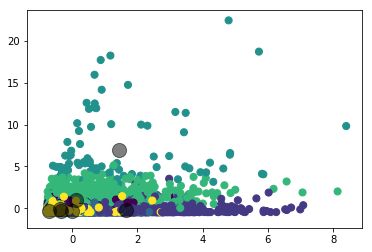

For n_clusters = 7, silhouette score is 0.21501415862714268)


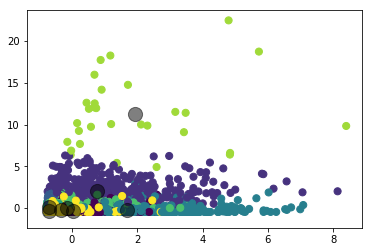

For n_clusters = 8, silhouette score is 0.2085401368165027)


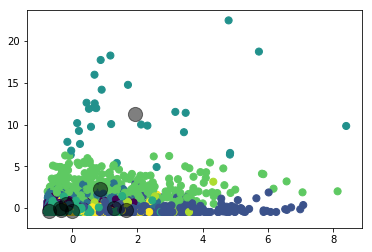

For n_clusters = 9, silhouette score is 0.22613410113784477)


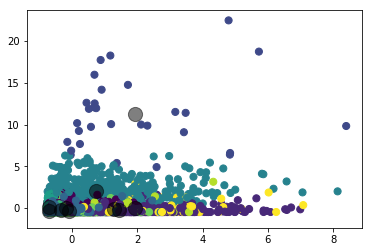

For n_clusters = 10, silhouette score is 0.21181292371151758)


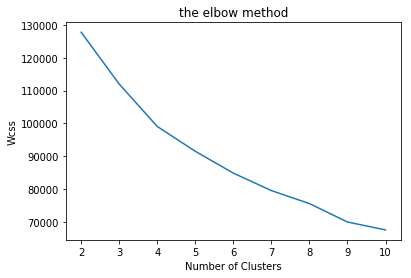

In [234]:
wcss = []
##elbow method to know the number of clusters
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    cluster_an=kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.scatter(X_scaled_array[:,0],X_scaled_array[:,2],c=cluster_an,s=50)
    centers=kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,2],c='black',s=200,alpha=0.5)
    plt.show()
    score = silhouette_score (X_scaled, cluster_an, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    
plt.plot(range(2,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [241]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(temp)
X_scaled= pd.DataFrame(data=X_pca)
print(temp)
print(X_scaled)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
5     0.117878           0.518084   0.154492         -0.356934   
6    -0.450277           0.518084   2.849408          3.500548   
7     0.124520           0.518084  -0.265388         -0.356934   
8    -0.264026           0.518084  -0.066330          0.041603   
9    -0.678504          -1.400712   0.130303          0.415209   
10   -0.130368           0.518084  -0.038888         -0.356934   
11   -0.448579          -0.249434   0.228866          0.542081   
12   -0.022843           0.518084   1.036634          1.149414   
13   -0.308819           0.518084   0.531110         -0.103915   
14    0.58

# wcss = []
##elbow method to know the number of clusters
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    cluster_an=kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.scatter(X_scaled_array[:,0],X_scaled_array[:,1],c=cluster_an,s=50)
    print(X_scaled_array)
    centers=kmeans.cluster_centers_
    plt.show()
    print(centers.shape)

    plt.scatter(centers[:,0],centers[:,2],c='black',s=200,alpha=0.5)
    plt.show()
    score = silhouette_score (X_scaled, cluster_an, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    
plt.plot(range(2,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()